<a href="https://colab.research.google.com/github/tiyasadey3/GEN_AI/blob/main/Food_Recognition%26Recipe_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install Dependencies
%pip install --quiet torch torchvision transformers pillow crewai

In [ ]:
!pip install -q langchain langchain_community langchain-openai

In [ ]:
!pip install colab-xterm

In [4]:
%load_ext colabxterm

In [ ]:
%xterm

In [6]:
# Step 2: Imports
from crewai import Agent, Task, Crew
from crewai.process import Process
from langchain.llms import Ollama
from PIL import Image
from google.colab import files
from IPython.display import display
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

Saving f1.jpeg to f1.jpeg


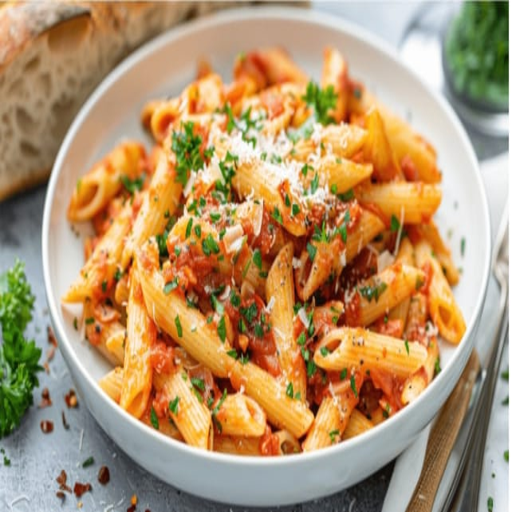

In [7]:
# Step 3: Upload Food Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
food_image = Image.open(image_path).convert("RGB").resize((512, 512))
display(food_image)

In [ ]:
# Step 4: BLIP to Describe Food
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [9]:
inputs = processor(food_image, return_tensors="pt")
with torch.no_grad():
    output = model.generate(**inputs)
    blip_description = processor.decode(output[0], skip_special_tokens=True)

In [10]:
print("BLIP Food Description:", blip_description)

BLIP Food Description: a bowl of pasta with tomato sauce and par parise


In [ ]:
# Step 5: Set Up LLaMA 3
llm = Ollama(model="ollama/llama3")

In [12]:
# Step 6: Define Agents
dish_identifier = Agent(
    role="Food Identifier",
    goal="Identify the type of dish from the image",
    backstory="You're a culinary expert and can recognize global dishes from just an image.",
    llm=llm,
    allow_delegation=False,
    verbose=False
)

recipe_writer = Agent(
    role="Recipe Generator",
    goal="Generate a full recipe based on the dish identified",
    backstory="You are a professional chef and cookbook author, excellent at breaking down steps.",
    llm=llm,
    allow_delegation=False,
    verbose=False
)

health_coach = Agent(
    role="Health Coach",
    goal="Suggest a healthier version of the dish",
    backstory="You’re a nutritionist who loves turning comfort food into healthier alternatives.",
    llm=llm,
    allow_delegation=False,
    verbose=False
)



In [13]:
# Step 7: Tasks
task1 = Task(
    description=f"Identify this dish based on the image description: '{blip_description}'. Be specific.",
    agent=dish_identifier,
    expected_output="Exact dish name and origin if possible."
)

task2 = Task(
    description=f"Create a detailed recipe for the dish: '{blip_description}'. Include ingredients and steps.",
    agent=recipe_writer,
    expected_output="Full step-by-step recipe with ingredients and instructions."
)

task3 = Task(
    description=f"Suggest a healthier or diet-friendly version of this dish: '{blip_description}'.",
    agent=health_coach,
    expected_output="Nutritionally optimized version with substitutions."
)


In [14]:
# Step 8: Assemble Crew
crew = Crew(
    agents=[dish_identifier, recipe_writer, health_coach],
    tasks=[task1, task2, task3],
    verbose=0,
    process=Process.sequential
)

In [15]:
# Step 9: Run Crew
result = crew.kickoff()
print("\n Final Output:\n", result)


 Final Output:
 I'm excited to provide my final answer! Here it is:

**Final Answer**

**Pasta with Tomato Sauce and Parmesan Recipe (Healthier Version)**

**Servings:** 4-6 people

**Ingredients:**

* **Pasta:**
	+ 12 oz (340g) whole wheat spaghetti or other long, thin pasta of your choice
* **Tomato Sauce:**
	+ 1 can (14.5 oz/410g) low-sodium crushed tomatoes
	+ 2 tablespoons olive oil
	+ 4 garlic cloves, minced
	+ 1 onion, finely chopped
	+ 1 teaspoon dried oregano
	+ 1/2 teaspoon salt-free seasoning blend
	+ 1/4 teaspoon black pepper
* **Parmesan:**
	+ 8 oz (225g) reduced-fat Parmesan cheese, grated
* **Fresh Basil Leaves:** 1/4 cup chopped fresh basil leaves (optional)

**Instructions:**

**Step 1: Cook the Pasta**

1. Bring a large pot of salted water to a boil.
2. Add the whole wheat spaghetti and cook according to package instructions until al dente.
3. Reserve 1 cup of pasta cooking water before draining the spaghetti.

**Step 2: Prepare the Tomato Sauce**

1. In a large sauc